<p align="center">
  <img src="assets/etab_logo.png" width="320">
</p>

# Demo 1: ETAB Data Loading and Processing Tools

This notebook provides a demonstration for the datasets and data processing functionalities in ETAB. We start by importing the relevant modules from *etab.datasets* and *etab.utils* as shown below

In [1]:
import os

current_dir = os.path.split(os.getcwd())[0]

os.chdir(current_dir)

from etab.datasets import *
from etab.utils.visualization import *

## The *ETAB_dataset* class

Each dataset is an instantiation of the *ETAB_dataset* class, which contains common attributes and a unified API for all data processing functionalities. In what follows, we provide an example where we create an instance of the class to be loaded with data from the EchoNet dataset...

In [3]:
echonet = ETAB_dataset(name="echonet",
                       target="LV_seg", 
                       view="A4",
                       video=False,
                       normalize=False,
                       frame_l=224,
                       frame_w=224,
                       clip_l=1)

The *ETAB_dataset* class has a number of options (attributes) that determine the structure of the data to be loaded. The options are:

- **name:** The source of the data to be loaded. Current options include "echonet", "camus" and "tmed".
- **target:** The labels associated with each patient. Options include "EF", "LV_seg", "LA_seg", "MY_seg", "ES/ED", "view", "CM", "AS".
- **view:** The echocardiographic views for the loaded data. Options include "AP4CH", "AP2CH", "PLAX" and "PSAX".
- **video:** A boolean indicating whether data should be loaded as a sequence of frames for each patient. Setting this to "False" means that data will include only the first frame in each clip.
- **normalize:** A boolean indicating whether pixel values should be normalized using the ImageNet mean and variance.
- **frame_l, frame_w and clip_l:** Frame length and width (in terms of the number of pixels), and clip length in terms of number of frames.
- **fps:** Sampling rate for the loaded video. 
- **padding:** Add zeros to clips that are shorter than *clip_l*.

## Loading the data

In the cell above, we have created an instance of the *ETAB_dataset* class and called it *echonet*. The attributes of this class are set so that data is loaded from the EchoNet dataset, and labels are traces of the left ventricle segments extracted from the apical 4-chamber views. Here, we extract 224 x 224 frames from the echo clip and set video=False (and clip_l=1) to extract still images instead of videos. To load data into this class, we call the *load_data* method and determine the number of data points to be loaded (here we set it to 100 echoes).

In [4]:
echonet.load_data(n_clips=100)

The output will be a list of size equal to *n_clips*, and is saved in the *.data* attribute of the *ETAB_dataset* class.

In [5]:
len(echonet.data)

100

## Visualizing anatomic segments

Now let us visualize the LV segments associated with patient number *index*

In [6]:
index      = 65
echo_image = echonet.data[index][0]
LV_segment = echonet.data[index][1][0]

The function that visualizes the segments overlaid on top of the original echo image is *plot_segment*. You can use this function as shown below:

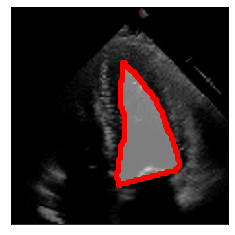

In [7]:
plot_segment(echo_image, LV_segment, overlay=True, color="r")

Now let us create a new instance of EchoNet but with a different data structure. This time, we create a video data set where the labels correspond to the LV ejection fraction. To create such an instance, we supply the class with the set of options and attributes below.

## Loading and animating video data

In [8]:
echonet = ETAB_dataset(name="echonet",
                       target="EF", 
                       view="A4",
                       video=False,
                       normalize=True,
                       frame_l=224,
                       frame_w=224,
                       clip_l=16, 
                       fps=50,
                       padding=None)

We can load 100 samples of this data in a similar manner as in the previous example:

In [9]:
echonet.load_data(n_clips=100)

Each data point in the loaded data set comprises an *clip_l x n_channels x frame_h x frame_w* torch tensor, and the label is a tuple containing the LV EF, the index of the first end-systole frame, and the index for the first end-diastole frame.

In [10]:
echonet.data[0][0].shape, echonet.data[0][1]

(torch.Size([16, 3, 224, 224]), (59.10199, 3, 18))

The echo clip can be animated and saved as a gif file using the "create_echo_clip" function in *video_tools* module as follows

In [11]:
from etab.utils.video_tools import *

create_echo_clip(echonet.data[0][0], "demo_clip")

The clip will be saved in the "echo_clips" folder under the main directory with the filename supplied to the second argument of the function. You should find the gif animation below saved in the aforementioned folder upon running the cell above.

![SegmentLocal](echo_clips/demo_clip.gif "Echo_sample")

## Further examples with other data sets and anatomic annotations

Below is a set of examples on how to load segmented data from CAMUS in a similar manner to the previous examples.

In [12]:
camus = ETAB_dataset(name="camus",
                     target="LV_seg",
                     view="A4",
                     video=False,
                     normalize=False,
                     frame_l=224,
                     frame_w=224,
                     clip_l=16, 
                     fps=50,
                     padding=None)

camus.load_data(n_clips=100)

camus_image = camus.data[index][0]
LV_segment  = camus.data[index][1][0]

Visualizing the Left Ventricle segments...

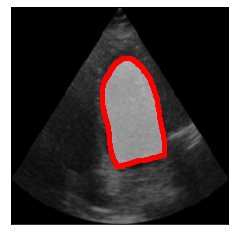

In [15]:
plot_segment(camus_image, LV_segment, overlay=True, color="r")

Another example for loading CAMUS data with Left Atrium segments...

In [16]:
camus = ETAB_dataset(name="camus",
                     target="LA_seg",
                     view="A2",
                     video=False,
                     normalize=False,
                     frame_l=224,
                     frame_w=224,
                     clip_l=16, 
                     fps=50,
                     padding=None)

camus.load_data(n_clips=100)

camus_image = camus.data[index][0]
LA_segment  = camus.data[index][1][0]

Visualizing the Left Atrium for a given patient...

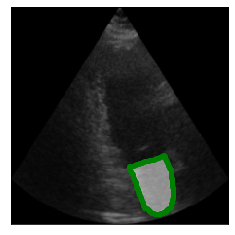

In [19]:
plot_segment(camus_image, LA_segment, overlay=True, color="g")

Final example for loading myocardial wall segments using the apical 2-chamber view

In [20]:
camus = ETAB_dataset(name="camus",
                     target="MY_seg",
                     view="A2",
                     video=False,
                     normalize=False,
                     frame_l=224,
                     frame_w=224,
                     clip_l=16, 
                     fps=50,
                     padding=None)

camus.load_data(n_clips=100)

camus_image = camus.data[index][0]
MY_segment  = camus.data[index][1][0]

Visualizing the myocardial wall...

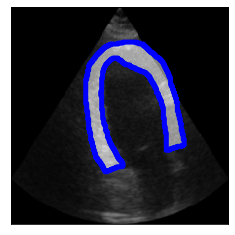

In [23]:
plot_segment(camus_image, MY_segment, overlay=True, color="b")